In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn import preprocessing

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN, Flatten
from keras import optimizers

Using TensorFlow backend.


### Questão 01

#### item A)

In [2]:
# Carregamento do csv
df = pd.read_csv('/home/viviane/Documentos/datasets/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv',index_col='Unnamed: 0',usecols=['Unnamed: 0','Review Text','Rating'])

In [3]:
# Uma amostra dos dados
df.head(5)

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [4]:
# Dimensões do dataset
df.shape

(23486, 2)

In [5]:
# Quantidade de textos
df['Review Text'].shape

(23486,)

In [6]:
# Quantidade de classes existentes no problema
df['Rating'].unique().shape

(5,)

In [7]:
# Classes existentes no problema
df['Rating'].unique()

array([4, 5, 3, 2, 1])

In [8]:
df.isnull().sum()

Review Text    845
Rating           0
dtype: int64

In [9]:
df = df.dropna(how='any',axis=0)

In [10]:
df.isnull().sum()

Review Text    0
Rating         0
dtype: int64

In [11]:
# X = data.iloc[:,1:10].values
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
y = le.fit_transform(y)

In [14]:
np.sum(X.shape[0])

22641

In [15]:
X.shape

(22641,)

In [16]:
y.shape

(22641,)

In [17]:
X[100]

"The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40."

In [18]:
y[100]

1

#### Item B)

In [19]:
max_words = 3000
max_len = 300

In [20]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)

In [21]:
sequences = tok.texts_to_sequences(X)
matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [22]:
matrix.shape

(22641, 300)

In [23]:
X_matrix, X_test, y_matrix, y_test = model_selection.train_test_split(matrix,y,test_size=0.1,random_state=42,stratify=y)

In [24]:
# dados para dividir em treino e validação
X_matrix.shape, y_matrix.shape

((20376, 300), (20376,))

In [25]:
# dados de teste
X_test.shape, y_test.shape

((2265, 300), (2265,))

In [26]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_matrix,y_matrix,test_size=0.11115,random_state=42,stratify=y_matrix)

In [27]:
# dados de treino
X_train.shape, y_train.shape

((18111, 300), (18111,))

In [28]:
# dados de validação
X_val.shape, y_val.shape

((2265, 300), (2265,))

In [29]:
def plotar(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [30]:
def rnn(otimizador, eta, num_epochs, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Embedding(max_words, 32))
    model.add(LSTM(32))
    model.add(Dense(5, activation='sigmoid'))
    
    model.compile(optimizer=otimizador(lr=eta), loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=128,validation_data=(X_val,y_val))
    
    plotar(history)

In [31]:
name_otimizadores = ['RMSprop','SGD','Adamax']
otimizadores = [optimizers.RMSprop, optimizers.SGD, optimizers.Adamax]
eta = [0.001,0.01,0.1]
epochs = [10,40,70]

otimizador:  RMSprop
eta:  0.001
num epocas:  10
Train on 18111 samples, validate on 2265 samples
Epoch 1/10
18111/18111 [==============================] - 50s 3ms/step - loss: 1.1665 - acc: 0.5570 - val_loss: 0.9926 - val_acc: 0.5744
Epoch 2/10
18111/18111 [==============================] - 49s 3ms/step - loss: 0.9710 - acc: 0.5855 - val_loss: 0.9317 - val_acc: 0.5921
Epoch 3/10
18111/18111 [==============================] - 51s 3ms/step - loss: 0.9122 - acc: 0.6099 - val_loss: 0.9593 - val_acc: 0.6053
Epoch 4/10
18111/18111 [==============================] - 52s 3ms/step - loss: 0.8835 - acc: 0.6224 - val_loss: 0.9526 - val_acc: 0.5996
Epoch 5/10
18111/18111 [==============================] - 51s 3ms/step - loss: 0.8665 - acc: 0.6339 - val_loss: 0.8925 - val_acc: 0.6265
Epoch 6/10
18111/18111 [==============================] - 52s 3ms/step - loss: 0.8469 - acc: 0.6407 - val_loss: 0.8957 - val_acc: 0.6247
Epoch 7/10
18111/18111 [==============================] - 53s 3ms/step - loss: 0

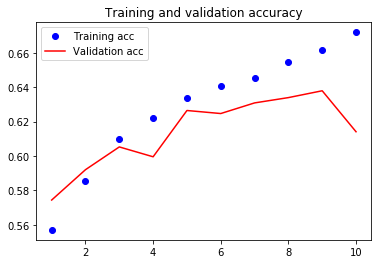

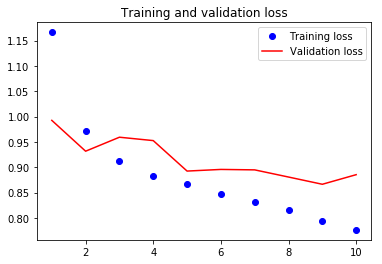

otimizador:  RMSprop
eta:  0.001
num epocas:  40
Train on 18111 samples, validate on 2265 samples
Epoch 1/40
18111/18111 [==============================] - 59s 3ms/step - loss: 1.1937 - acc: 0.5528 - val_loss: 1.1258 - val_acc: 0.5801
Epoch 2/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0.9744 - acc: 0.5929 - val_loss: 0.9329 - val_acc: 0.5987
Epoch 3/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0.9069 - acc: 0.6233 - val_loss: 1.2600 - val_acc: 0.5810
Epoch 4/40
18111/18111 [==============================] - 56s 3ms/step - loss: 0.8723 - acc: 0.6355 - val_loss: 0.8779 - val_acc: 0.6247
Epoch 5/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8519 - acc: 0.6342 - val_loss: 0.9150 - val_acc: 0.6252
Epoch 6/40
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8358 - acc: 0.6462 - val_loss: 0.8649 - val_acc: 0.6322
Epoch 7/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0

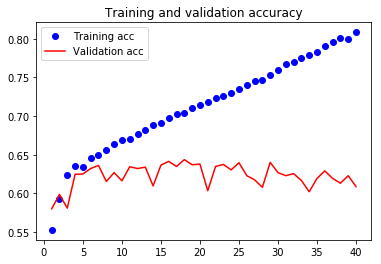

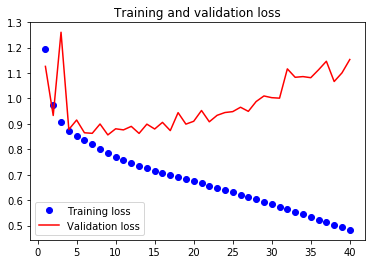

otimizador:  RMSprop
eta:  0.001
num epocas:  70
Train on 18111 samples, validate on 2265 samples
Epoch 1/70
18111/18111 [==============================] - 56s 3ms/step - loss: 1.2242 - acc: 0.5518 - val_loss: 1.0551 - val_acc: 0.5620
Epoch 2/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.9971 - acc: 0.5834 - val_loss: 0.9490 - val_acc: 0.5943
Epoch 3/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.9293 - acc: 0.6084 - val_loss: 0.9215 - val_acc: 0.6141
Epoch 4/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8960 - acc: 0.6224 - val_loss: 0.9566 - val_acc: 0.6181
Epoch 5/70
18111/18111 [==============================] - 57s 3ms/step - loss: 0.8707 - acc: 0.6333 - val_loss: 0.9028 - val_acc: 0.6212
Epoch 6/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8486 - acc: 0.6393 - val_loss: 0.8711 - val_acc: 0.6327
Epoch 7/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0

Epoch 60/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.3290 - acc: 0.8805 - val_loss: 1.5040 - val_acc: 0.5987
Epoch 61/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.3224 - acc: 0.8810 - val_loss: 1.4464 - val_acc: 0.5704
Epoch 62/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.3152 - acc: 0.8869 - val_loss: 1.5314 - val_acc: 0.5974
Epoch 63/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.3084 - acc: 0.8891 - val_loss: 1.5981 - val_acc: 0.5651
Epoch 64/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.3022 - acc: 0.8928 - val_loss: 1.5220 - val_acc: 0.5929
Epoch 65/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.3033 - acc: 0.8911 - val_loss: 1.5294 - val_acc: 0.5810
Epoch 66/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.2871 - acc: 0.8980 - val_loss: 1.6468 - val_acc: 0.5770
Epoch 67/70
18111/18111 [=========

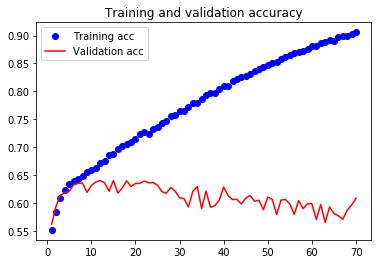

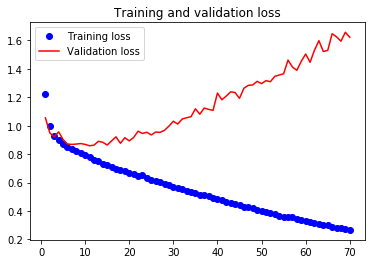

otimizador:  RMSprop
eta:  0.01
num epocas:  10
Train on 18111 samples, validate on 2265 samples
Epoch 1/10
18111/18111 [==============================] - 55s 3ms/step - loss: 1.1264 - acc: 0.5645 - val_loss: 0.9902 - val_acc: 0.6044
Epoch 2/10
18111/18111 [==============================] - 54s 3ms/step - loss: 0.9436 - acc: 0.6073 - val_loss: 0.8804 - val_acc: 0.6283
Epoch 3/10
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8506 - acc: 0.6368 - val_loss: 0.8854 - val_acc: 0.6455
Epoch 4/10
18111/18111 [==============================] - 54s 3ms/step - loss: 0.7860 - acc: 0.6678 - val_loss: 0.8955 - val_acc: 0.6428
Epoch 5/10
18111/18111 [==============================] - 54s 3ms/step - loss: 0.7394 - acc: 0.6853 - val_loss: 0.9297 - val_acc: 0.6221
Epoch 6/10
18111/18111 [==============================] - 54s 3ms/step - loss: 0.6890 - acc: 0.7110 - val_loss: 0.8954 - val_acc: 0.6517
Epoch 7/10
18111/18111 [==============================] - 54s 3ms/step - loss: 0.

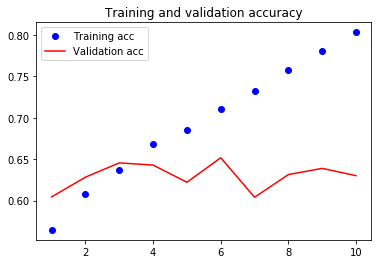

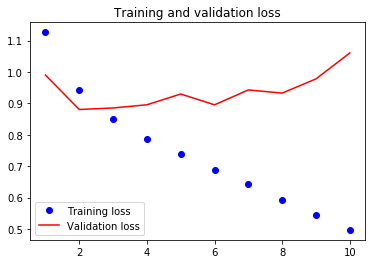

otimizador:  RMSprop
eta:  0.01
num epocas:  40
Train on 18111 samples, validate on 2265 samples
Epoch 1/40
18111/18111 [==============================] - 55s 3ms/step - loss: 1.1184 - acc: 0.5671 - val_loss: 0.9663 - val_acc: 0.5982
Epoch 2/40
18111/18111 [==============================] - 53s 3ms/step - loss: 0.9466 - acc: 0.6089 - val_loss: 0.9127 - val_acc: 0.6159
Epoch 3/40
18111/18111 [==============================] - 53s 3ms/step - loss: 0.8402 - acc: 0.6423 - val_loss: 0.8605 - val_acc: 0.6296
Epoch 4/40
18111/18111 [==============================] - 54s 3ms/step - loss: 0.7692 - acc: 0.6682 - val_loss: 0.8815 - val_acc: 0.6402
Epoch 5/40
18111/18111 [==============================] - 54s 3ms/step - loss: 0.7098 - acc: 0.6910 - val_loss: 0.8701 - val_acc: 0.6384
Epoch 6/40
18111/18111 [==============================] - 54s 3ms/step - loss: 0.6631 - acc: 0.7153 - val_loss: 0.9233 - val_acc: 0.6234
Epoch 7/40
18111/18111 [==============================] - 54s 3ms/step - loss: 0.

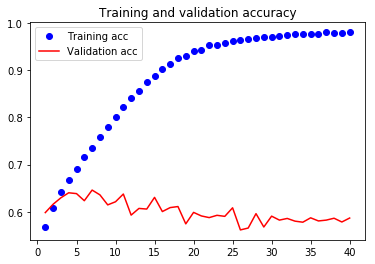

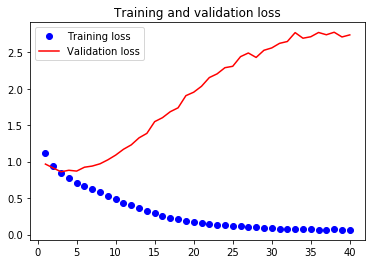

otimizador:  RMSprop
eta:  0.01
num epocas:  70
Train on 18111 samples, validate on 2265 samples
Epoch 1/70
18111/18111 [==============================] - 55s 3ms/step - loss: 1.0855 - acc: 0.5741 - val_loss: 0.9650 - val_acc: 0.6115
Epoch 2/70
18111/18111 [==============================] - 53s 3ms/step - loss: 0.9043 - acc: 0.6235 - val_loss: 0.8565 - val_acc: 0.6389
Epoch 3/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8174 - acc: 0.6521 - val_loss: 0.9331 - val_acc: 0.6327
Epoch 4/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.7594 - acc: 0.6796 - val_loss: 0.9263 - val_acc: 0.5956
Epoch 5/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.7102 - acc: 0.7008 - val_loss: 0.8854 - val_acc: 0.6371
Epoch 6/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.6648 - acc: 0.7231 - val_loss: 0.8957 - val_acc: 0.6446
Epoch 7/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.

Epoch 60/70
18111/18111 [==============================] - 53s 3ms/step - loss: 0.0455 - acc: 0.9844 - val_loss: 2.9452 - val_acc: 0.5788
Epoch 61/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.0482 - acc: 0.9845 - val_loss: 2.9156 - val_acc: 0.5960
Epoch 62/70
18111/18111 [==============================] - 53s 3ms/step - loss: 0.0505 - acc: 0.9850 - val_loss: 2.9515 - val_acc: 0.5868
Epoch 63/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.0459 - acc: 0.9857 - val_loss: 2.9629 - val_acc: 0.5766
Epoch 64/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.0450 - acc: 0.9869 - val_loss: 2.9510 - val_acc: 0.5837
Epoch 65/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.0516 - acc: 0.9840 - val_loss: 3.0567 - val_acc: 0.5647
Epoch 66/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.0492 - acc: 0.9832 - val_loss: 3.1395 - val_acc: 0.5594
Epoch 67/70
18111/18111 [=========

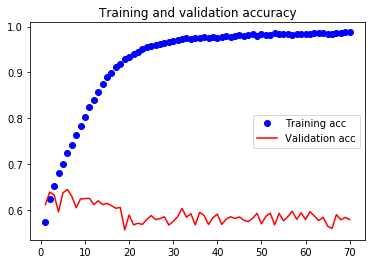

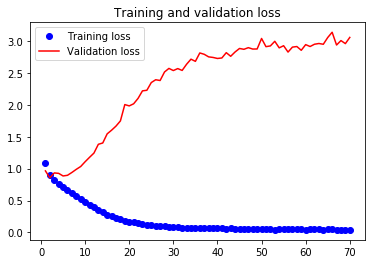

otimizador:  RMSprop
eta:  0.1
num epocas:  10
Train on 18111 samples, validate on 2265 samples
Epoch 1/10
18111/18111 [==============================] - 55s 3ms/step - loss: 1.4017 - acc: 0.5521 - val_loss: 1.3457 - val_acc: 0.5554
Epoch 2/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2762 - acc: 0.5578 - val_loss: 1.2434 - val_acc: 0.5687
Epoch 3/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.1569 - acc: 0.5646 - val_loss: 1.1313 - val_acc: 0.5638
Epoch 4/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.1494 - acc: 0.5649 - val_loss: 1.2299 - val_acc: 0.5687
Epoch 5/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.1119 - acc: 0.5676 - val_loss: 1.1395 - val_acc: 0.5740
Epoch 6/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.0984 - acc: 0.5721 - val_loss: 1.1360 - val_acc: 0.5647
Epoch 7/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.0

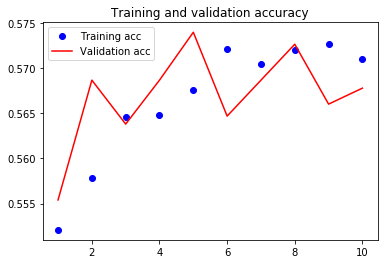

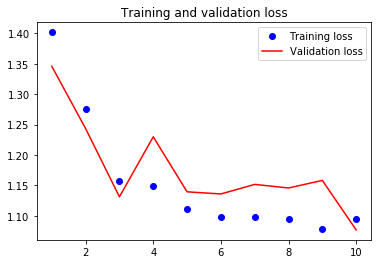

otimizador:  RMSprop
eta:  0.1
num epocas:  40
Train on 18111 samples, validate on 2265 samples
Epoch 1/40
18111/18111 [==============================] - 56s 3ms/step - loss: 1.4350 - acc: 0.5479 - val_loss: 1.3701 - val_acc: 0.5536
Epoch 2/40
18111/18111 [==============================] - 53s 3ms/step - loss: 1.4146 - acc: 0.5539 - val_loss: 1.4835 - val_acc: 0.5536
Epoch 3/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4125 - acc: 0.5539 - val_loss: 1.5924 - val_acc: 0.5536
Epoch 4/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4080 - acc: 0.5539 - val_loss: 1.4608 - val_acc: 0.5536
Epoch 5/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4121 - acc: 0.5539 - val_loss: 1.3212 - val_acc: 0.5536
Epoch 6/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4115 - acc: 0.5539 - val_loss: 1.4290 - val_acc: 0.5536
Epoch 7/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4

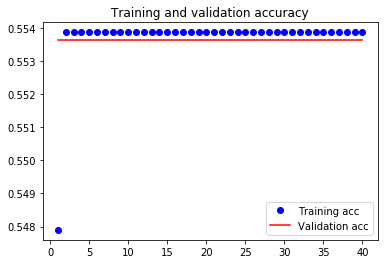

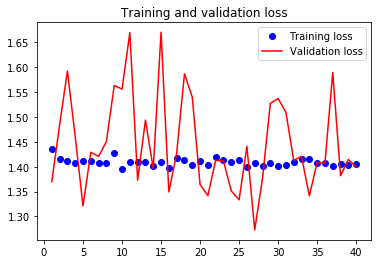

otimizador:  RMSprop
eta:  0.1
num epocas:  70
Train on 18111 samples, validate on 2265 samples
Epoch 1/70
18111/18111 [==============================] - 56s 3ms/step - loss: 1.4427 - acc: 0.5504 - val_loss: 1.7324 - val_acc: 0.5536
Epoch 2/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.4102 - acc: 0.5539 - val_loss: 1.4591 - val_acc: 0.5536
Epoch 3/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4136 - acc: 0.5539 - val_loss: 1.4544 - val_acc: 0.5536
Epoch 4/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.3981 - acc: 0.5539 - val_loss: 1.3951 - val_acc: 0.5536
Epoch 5/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.4043 - acc: 0.5539 - val_loss: 1.5866 - val_acc: 0.5536
Epoch 6/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4044 - acc: 0.5539 - val_loss: 1.4693 - val_acc: 0.5536
Epoch 7/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.4

Epoch 60/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.4039 - acc: 0.5539 - val_loss: 1.2797 - val_acc: 0.5536
Epoch 61/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4035 - acc: 0.5539 - val_loss: 1.4093 - val_acc: 0.5536
Epoch 62/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4033 - acc: 0.5539 - val_loss: 1.4834 - val_acc: 0.5536
Epoch 63/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4120 - acc: 0.5539 - val_loss: 1.3834 - val_acc: 0.5536
Epoch 64/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.3978 - acc: 0.5539 - val_loss: 1.4726 - val_acc: 0.5536
Epoch 65/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4031 - acc: 0.5539 - val_loss: 1.4744 - val_acc: 0.5536
Epoch 66/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4149 - acc: 0.5539 - val_loss: 1.2599 - val_acc: 0.5536
Epoch 67/70
18111/18111 [=========

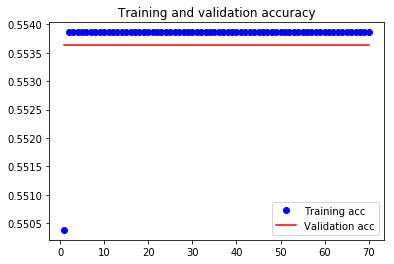

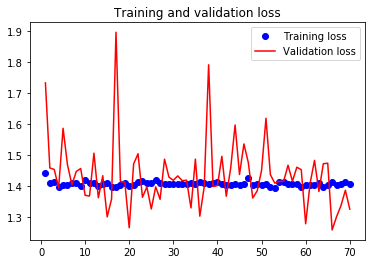

otimizador:  SGD
eta:  0.001
num epocas:  10
Train on 18111 samples, validate on 2265 samples
Epoch 1/10
18111/18111 [==============================] - 55s 3ms/step - loss: 1.6019 - acc: 0.4947 - val_loss: 1.5945 - val_acc: 0.5536
Epoch 2/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.5872 - acc: 0.5539 - val_loss: 1.5803 - val_acc: 0.5536
Epoch 3/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.5734 - acc: 0.5539 - val_loss: 1.5668 - val_acc: 0.5536
Epoch 4/10
18111/18111 [==============================] - 53s 3ms/step - loss: 1.5602 - acc: 0.5539 - val_loss: 1.5539 - val_acc: 0.5536
Epoch 5/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.5477 - acc: 0.5539 - val_loss: 1.5417 - val_acc: 0.5536
Epoch 6/10
18111/18111 [==============================] - 53s 3ms/step - loss: 1.5356 - acc: 0.5539 - val_loss: 1.5299 - val_acc: 0.5536
Epoch 7/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.524

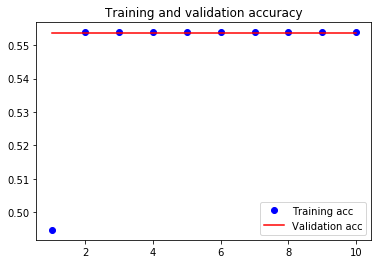

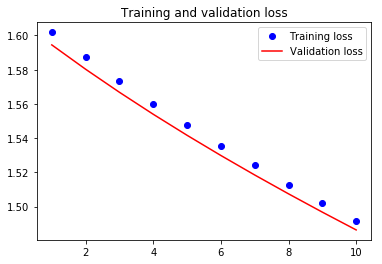

otimizador:  SGD
eta:  0.001
num epocas:  40
Train on 18111 samples, validate on 2265 samples
Epoch 1/40
18111/18111 [==============================] - 56s 3ms/step - loss: 1.6024 - acc: 0.4996 - val_loss: 1.5954 - val_acc: 0.5536
Epoch 2/40
18111/18111 [==============================] - 53s 3ms/step - loss: 1.5889 - acc: 0.5539 - val_loss: 1.5823 - val_acc: 0.5536
Epoch 3/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.5762 - acc: 0.5539 - val_loss: 1.5700 - val_acc: 0.5536
Epoch 4/40
18111/18111 [==============================] - 53s 3ms/step - loss: 1.5642 - acc: 0.5539 - val_loss: 1.5583 - val_acc: 0.5536
Epoch 5/40
18111/18111 [==============================] - 53s 3ms/step - loss: 1.5529 - acc: 0.5539 - val_loss: 1.5473 - val_acc: 0.5536
Epoch 6/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.5420 - acc: 0.5539 - val_loss: 1.5367 - val_acc: 0.5536
Epoch 7/40
18111/18111 [==============================] - 53s 3ms/step - loss: 1.531

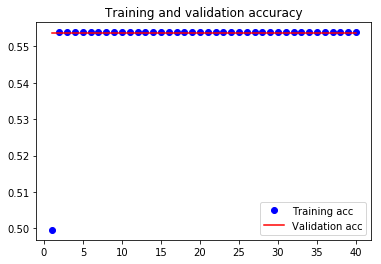

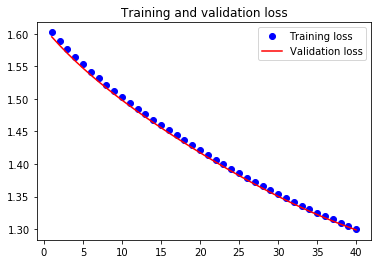

otimizador:  SGD
eta:  0.001
num epocas:  70
Train on 18111 samples, validate on 2265 samples
Epoch 1/70
18111/18111 [==============================] - 56s 3ms/step - loss: 1.6008 - acc: 0.4957 - val_loss: 1.5921 - val_acc: 0.5536
Epoch 2/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.5842 - acc: 0.5539 - val_loss: 1.5762 - val_acc: 0.5536
Epoch 3/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.5687 - acc: 0.5539 - val_loss: 1.5612 - val_acc: 0.5536
Epoch 4/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.5542 - acc: 0.5539 - val_loss: 1.5471 - val_acc: 0.5536
Epoch 5/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.5404 - acc: 0.5539 - val_loss: 1.5337 - val_acc: 0.5536
Epoch 6/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.5273 - acc: 0.5539 - val_loss: 1.5209 - val_acc: 0.5536
Epoch 7/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.514

Epoch 60/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.2356 - acc: 0.5539 - val_loss: 1.2354 - val_acc: 0.5536
Epoch 61/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2348 - acc: 0.5539 - val_loss: 1.2345 - val_acc: 0.5536
Epoch 62/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2340 - acc: 0.5539 - val_loss: 1.2337 - val_acc: 0.5536
Epoch 63/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2332 - acc: 0.5539 - val_loss: 1.2330 - val_acc: 0.5536
Epoch 64/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2325 - acc: 0.5539 - val_loss: 1.2323 - val_acc: 0.5536
Epoch 65/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2318 - acc: 0.5539 - val_loss: 1.2316 - val_acc: 0.5536
Epoch 66/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.2311 - acc: 0.5539 - val_loss: 1.2310 - val_acc: 0.5536
Epoch 67/70
18111/18111 [=========

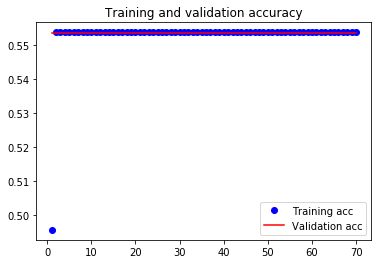

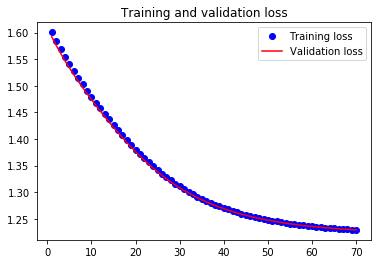

otimizador:  SGD
eta:  0.01
num epocas:  10
Train on 18111 samples, validate on 2265 samples
Epoch 1/10
18111/18111 [==============================] - 55s 3ms/step - loss: 1.5413 - acc: 0.5470 - val_loss: 1.4822 - val_acc: 0.5536
Epoch 2/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4353 - acc: 0.5539 - val_loss: 1.3910 - val_acc: 0.5536
Epoch 3/10
18111/18111 [==============================] - 53s 3ms/step - loss: 1.3538 - acc: 0.5539 - val_loss: 1.3196 - val_acc: 0.5536
Epoch 4/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2938 - acc: 0.5539 - val_loss: 1.2719 - val_acc: 0.5536
Epoch 5/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2572 - acc: 0.5539 - val_loss: 1.2455 - val_acc: 0.5536
Epoch 6/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2381 - acc: 0.5539 - val_loss: 1.2325 - val_acc: 0.5536
Epoch 7/10
18111/18111 [==============================] - 53s 3ms/step - loss: 1.2290

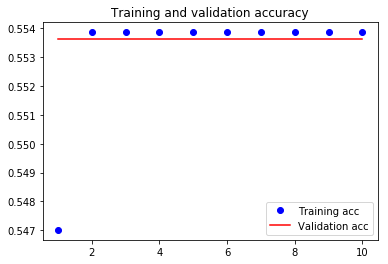

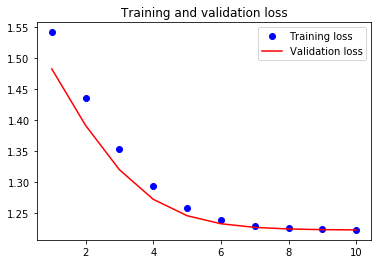

otimizador:  SGD
eta:  0.01
num epocas:  40
Train on 18111 samples, validate on 2265 samples
Epoch 1/40
18111/18111 [==============================] - 56s 3ms/step - loss: 1.5435 - acc: 0.5472 - val_loss: 1.4848 - val_acc: 0.5536
Epoch 2/40
18111/18111 [==============================] - 53s 3ms/step - loss: 1.4355 - acc: 0.5539 - val_loss: 1.3886 - val_acc: 0.5536
Epoch 3/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.3493 - acc: 0.5539 - val_loss: 1.3146 - val_acc: 0.5536
Epoch 4/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2900 - acc: 0.5539 - val_loss: 1.2700 - val_acc: 0.5536
Epoch 5/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2568 - acc: 0.5539 - val_loss: 1.2464 - val_acc: 0.5536
Epoch 6/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2393 - acc: 0.5539 - val_loss: 1.2341 - val_acc: 0.5536
Epoch 7/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2303

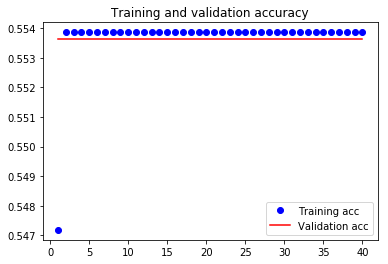

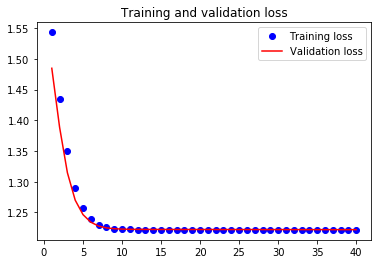

otimizador:  SGD
eta:  0.01
num epocas:  70
Train on 18111 samples, validate on 2265 samples
Epoch 1/70
18111/18111 [==============================] - 56s 3ms/step - loss: 1.5627 - acc: 0.5459 - val_loss: 1.5207 - val_acc: 0.5536
Epoch 2/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4848 - acc: 0.5539 - val_loss: 1.4495 - val_acc: 0.5536
Epoch 3/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.4153 - acc: 0.5539 - val_loss: 1.3806 - val_acc: 0.5536
Epoch 4/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.3476 - acc: 0.5539 - val_loss: 1.3162 - val_acc: 0.5536
Epoch 5/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2914 - acc: 0.5539 - val_loss: 1.2705 - val_acc: 0.5536
Epoch 6/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.2563 - acc: 0.5539 - val_loss: 1.2453 - val_acc: 0.5536
Epoch 7/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2379

Epoch 60/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.2215 - acc: 0.5539 - val_loss: 1.2219 - val_acc: 0.5536
Epoch 61/70
18111/18111 [==============================] - 55s 3ms/step - loss: 1.2215 - acc: 0.5539 - val_loss: 1.2219 - val_acc: 0.5536
Epoch 62/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.2215 - acc: 0.5539 - val_loss: 1.2219 - val_acc: 0.5536
Epoch 63/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2215 - acc: 0.5539 - val_loss: 1.2219 - val_acc: 0.5536
Epoch 64/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2215 - acc: 0.5539 - val_loss: 1.2219 - val_acc: 0.5536
Epoch 65/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2215 - acc: 0.5539 - val_loss: 1.2219 - val_acc: 0.5536
Epoch 66/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2215 - acc: 0.5539 - val_loss: 1.2219 - val_acc: 0.5536
Epoch 67/70
18111/18111 [=========

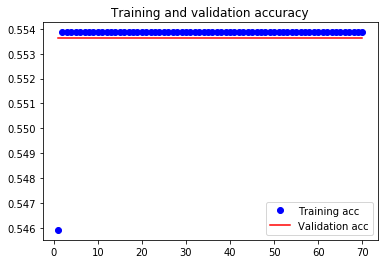

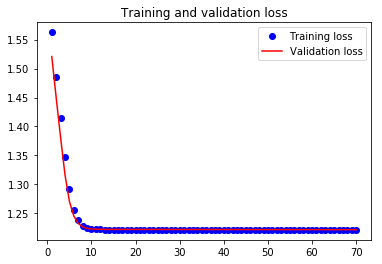

otimizador:  SGD
eta:  0.1
num epocas:  10
Train on 18111 samples, validate on 2265 samples
Epoch 1/10
18111/18111 [==============================] - 55s 3ms/step - loss: 1.3242 - acc: 0.5519 - val_loss: 1.2245 - val_acc: 0.5536
Epoch 2/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2226 - acc: 0.5539 - val_loss: 1.2224 - val_acc: 0.5536
Epoch 3/10
18111/18111 [==============================] - 53s 3ms/step - loss: 1.2224 - acc: 0.5539 - val_loss: 1.2222 - val_acc: 0.5536
Epoch 4/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2223 - acc: 0.5539 - val_loss: 1.2223 - val_acc: 0.5536
Epoch 5/10
18111/18111 [==============================] - 53s 3ms/step - loss: 1.2220 - acc: 0.5539 - val_loss: 1.2226 - val_acc: 0.5536
Epoch 6/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2220 - acc: 0.5539 - val_loss: 1.2223 - val_acc: 0.5536
Epoch 7/10
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2219 

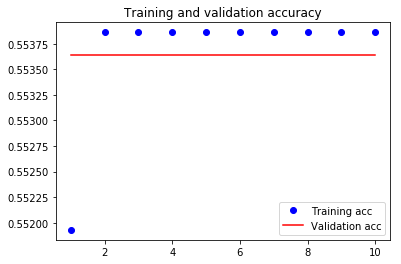

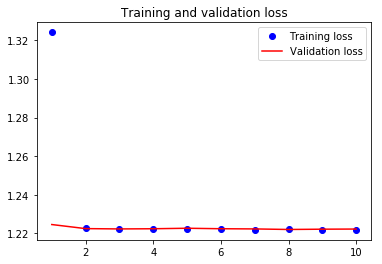

otimizador:  SGD
eta:  0.1
num epocas:  40
Train on 18111 samples, validate on 2265 samples
Epoch 1/40
18111/18111 [==============================] - 56s 3ms/step - loss: 1.3140 - acc: 0.5513 - val_loss: 1.2233 - val_acc: 0.5536
Epoch 2/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2224 - acc: 0.5539 - val_loss: 1.2223 - val_acc: 0.5536
Epoch 3/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2223 - acc: 0.5539 - val_loss: 1.2223 - val_acc: 0.5536
Epoch 4/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2222 - acc: 0.5539 - val_loss: 1.2222 - val_acc: 0.5536
Epoch 5/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2223 - acc: 0.5539 - val_loss: 1.2220 - val_acc: 0.5536
Epoch 6/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2221 - acc: 0.5539 - val_loss: 1.2222 - val_acc: 0.5536
Epoch 7/40
18111/18111 [==============================] - 55s 3ms/step - loss: 1.2219 

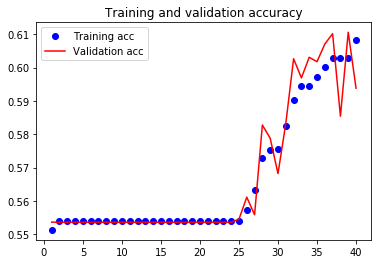

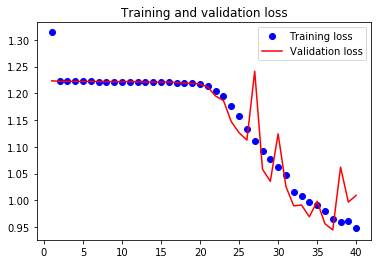

otimizador:  SGD
eta:  0.1
num epocas:  70
Train on 18111 samples, validate on 2265 samples
Epoch 1/70
18111/18111 [==============================] - 56s 3ms/step - loss: 1.3355 - acc: 0.5512 - val_loss: 1.2257 - val_acc: 0.5536
Epoch 2/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2229 - acc: 0.5539 - val_loss: 1.2223 - val_acc: 0.5536
Epoch 3/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2223 - acc: 0.5539 - val_loss: 1.2224 - val_acc: 0.5536
Epoch 4/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2224 - acc: 0.5539 - val_loss: 1.2222 - val_acc: 0.5536
Epoch 5/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2222 - acc: 0.5539 - val_loss: 1.2221 - val_acc: 0.5536
Epoch 6/70
18111/18111 [==============================] - 53s 3ms/step - loss: 1.2220 - acc: 0.5539 - val_loss: 1.2221 - val_acc: 0.5536
Epoch 7/70
18111/18111 [==============================] - 55s 3ms/step - loss: 1.2220 

Epoch 60/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8860 - acc: 0.6259 - val_loss: 0.9368 - val_acc: 0.6146
Epoch 61/70
18111/18111 [==============================] - 53s 3ms/step - loss: 0.8861 - acc: 0.6282 - val_loss: 0.9298 - val_acc: 0.6212
Epoch 62/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8800 - acc: 0.6280 - val_loss: 0.8964 - val_acc: 0.6252
Epoch 63/70
18111/18111 [==============================] - 53s 3ms/step - loss: 0.8804 - acc: 0.6247 - val_loss: 0.9541 - val_acc: 0.6106
Epoch 64/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8753 - acc: 0.6282 - val_loss: 0.9204 - val_acc: 0.6150
Epoch 65/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8821 - acc: 0.6274 - val_loss: 0.8872 - val_acc: 0.6185
Epoch 66/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8655 - acc: 0.6344 - val_loss: 0.8891 - val_acc: 0.6230
Epoch 67/70
18111/18111 [=========

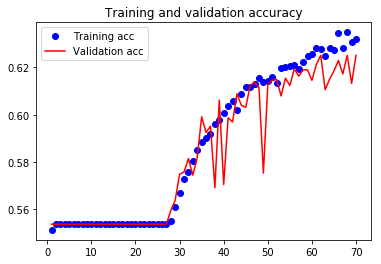

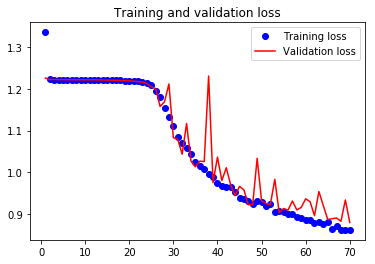

otimizador:  Adamax
eta:  0.001
num epocas:  10
Train on 18111 samples, validate on 2265 samples
Epoch 1/10
18111/18111 [==============================] - 57s 3ms/step - loss: 1.3380 - acc: 0.5487 - val_loss: 1.2208 - val_acc: 0.5536
Epoch 2/10
18111/18111 [==============================] - 55s 3ms/step - loss: 1.2183 - acc: 0.5539 - val_loss: 1.2150 - val_acc: 0.5536
Epoch 3/10
18111/18111 [==============================] - 55s 3ms/step - loss: 1.1982 - acc: 0.5539 - val_loss: 1.1597 - val_acc: 0.5536
Epoch 4/10
18111/18111 [==============================] - 56s 3ms/step - loss: 1.0788 - acc: 0.5549 - val_loss: 1.0245 - val_acc: 0.5594
Epoch 5/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.9886 - acc: 0.5631 - val_loss: 0.9899 - val_acc: 0.5709
Epoch 6/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.9535 - acc: 0.5815 - val_loss: 0.9648 - val_acc: 0.5881
Epoch 7/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.

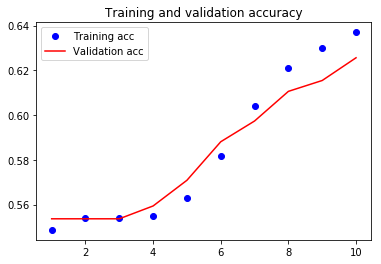

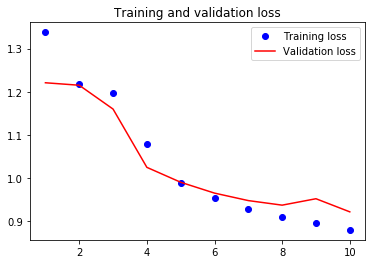

otimizador:  Adamax
eta:  0.001
num epocas:  40
Train on 18111 samples, validate on 2265 samples
Epoch 1/40
18111/18111 [==============================] - 56s 3ms/step - loss: 1.3411 - acc: 0.5492 - val_loss: 1.2213 - val_acc: 0.5536
Epoch 2/40
18111/18111 [==============================] - 55s 3ms/step - loss: 1.2193 - acc: 0.5539 - val_loss: 1.2170 - val_acc: 0.5536
Epoch 3/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.2037 - acc: 0.5539 - val_loss: 1.1673 - val_acc: 0.5536
Epoch 4/40
18111/18111 [==============================] - 55s 3ms/step - loss: 1.0954 - acc: 0.5543 - val_loss: 1.0469 - val_acc: 0.5558
Epoch 5/40
18111/18111 [==============================] - 54s 3ms/step - loss: 1.0086 - acc: 0.5617 - val_loss: 1.0069 - val_acc: 0.5717
Epoch 6/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0.9675 - acc: 0.5814 - val_loss: 0.9667 - val_acc: 0.5832
Epoch 7/40
18111/18111 [==============================] - 54s 3ms/step - loss: 0.

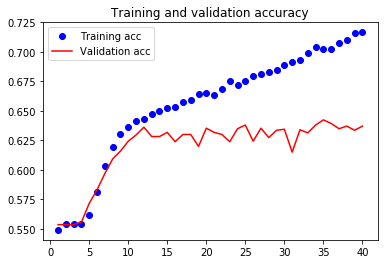

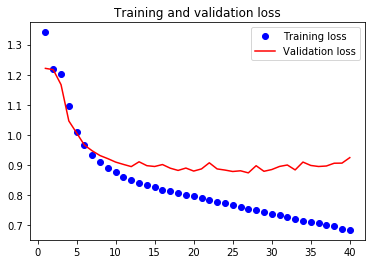

otimizador:  Adamax
eta:  0.001
num epocas:  70
Train on 18111 samples, validate on 2265 samples
Epoch 1/70
18111/18111 [==============================] - 57s 3ms/step - loss: 1.3264 - acc: 0.5487 - val_loss: 1.2185 - val_acc: 0.5536
Epoch 2/70
18111/18111 [==============================] - 55s 3ms/step - loss: 1.2107 - acc: 0.5539 - val_loss: 1.1964 - val_acc: 0.5536
Epoch 3/70
18111/18111 [==============================] - 55s 3ms/step - loss: 1.1222 - acc: 0.5539 - val_loss: 1.0466 - val_acc: 0.5545
Epoch 4/70
18111/18111 [==============================] - 54s 3ms/step - loss: 1.0070 - acc: 0.5588 - val_loss: 0.9960 - val_acc: 0.5687
Epoch 5/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.9632 - acc: 0.5730 - val_loss: 0.9689 - val_acc: 0.5810
Epoch 6/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.9372 - acc: 0.5919 - val_loss: 0.9549 - val_acc: 0.5991
Epoch 7/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.

Epoch 60/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.6165 - acc: 0.7411 - val_loss: 1.0353 - val_acc: 0.6181
Epoch 61/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.6140 - acc: 0.7413 - val_loss: 1.0346 - val_acc: 0.6172
Epoch 62/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.6043 - acc: 0.7462 - val_loss: 1.0443 - val_acc: 0.6071
Epoch 63/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.6052 - acc: 0.7445 - val_loss: 1.0425 - val_acc: 0.6137
Epoch 64/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.5971 - acc: 0.7471 - val_loss: 1.0533 - val_acc: 0.6110
Epoch 65/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.5945 - acc: 0.7502 - val_loss: 1.0713 - val_acc: 0.6000
Epoch 66/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.5984 - acc: 0.7476 - val_loss: 1.0624 - val_acc: 0.6075
Epoch 67/70
18111/18111 [=========

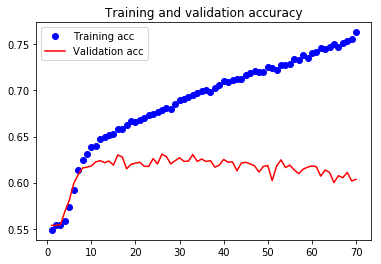

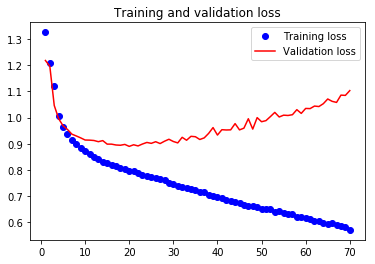

otimizador:  Adamax
eta:  0.01
num epocas:  10
Train on 18111 samples, validate on 2265 samples
Epoch 1/10
18111/18111 [==============================] - 57s 3ms/step - loss: 1.1497 - acc: 0.5578 - val_loss: 1.0022 - val_acc: 0.5947
Epoch 2/10
18111/18111 [==============================] - 54s 3ms/step - loss: 0.9544 - acc: 0.6075 - val_loss: 0.9451 - val_acc: 0.6194
Epoch 3/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8932 - acc: 0.6312 - val_loss: 0.9099 - val_acc: 0.6234
Epoch 4/10
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8478 - acc: 0.6407 - val_loss: 0.8958 - val_acc: 0.6177
Epoch 5/10
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8159 - acc: 0.6550 - val_loss: 0.8832 - val_acc: 0.6252
Epoch 6/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.7790 - acc: 0.6685 - val_loss: 0.8833 - val_acc: 0.6322
Epoch 7/10
18111/18111 [==============================] - 54s 3ms/step - loss: 0.7

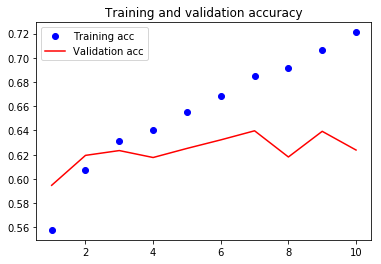

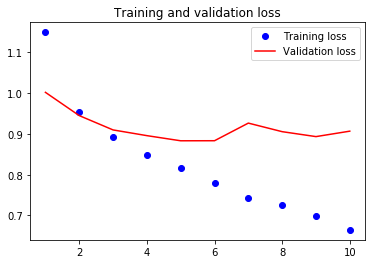

otimizador:  Adamax
eta:  0.01
num epocas:  40
Train on 18111 samples, validate on 2265 samples
Epoch 1/40
18111/18111 [==============================] - 80s 4ms/step - loss: 1.2030 - acc: 0.5510 - val_loss: 1.1118 - val_acc: 0.5536
Epoch 2/40
18111/18111 [==============================] - 74s 4ms/step - loss: 0.9966 - acc: 0.5897 - val_loss: 0.9549 - val_acc: 0.6159
Epoch 3/40
18111/18111 [==============================] - 57s 3ms/step - loss: 0.8815 - acc: 0.6307 - val_loss: 0.8990 - val_acc: 0.6265
Epoch 4/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8330 - acc: 0.6474 - val_loss: 0.9000 - val_acc: 0.6291
Epoch 5/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8062 - acc: 0.6555 - val_loss: 0.8736 - val_acc: 0.6322
Epoch 6/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0.7782 - acc: 0.6657 - val_loss: 0.8933 - val_acc: 0.6353
Epoch 7/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0.7

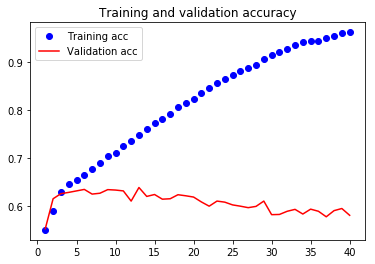

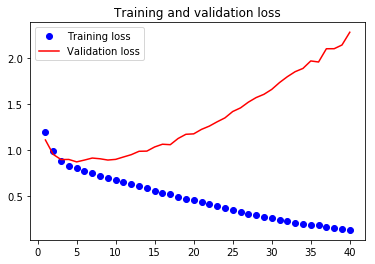

otimizador:  Adamax
eta:  0.01
num epocas:  70
Train on 18111 samples, validate on 2265 samples
Epoch 1/70
18111/18111 [==============================] - 57s 3ms/step - loss: 1.1785 - acc: 0.5549 - val_loss: 1.0232 - val_acc: 0.5881
Epoch 2/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.9478 - acc: 0.6089 - val_loss: 0.9080 - val_acc: 0.6291
Epoch 3/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8668 - acc: 0.6340 - val_loss: 0.9204 - val_acc: 0.6022
Epoch 4/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8344 - acc: 0.6456 - val_loss: 0.8657 - val_acc: 0.6415
Epoch 5/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.7955 - acc: 0.6602 - val_loss: 0.8474 - val_acc: 0.6446
Epoch 6/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.7666 - acc: 0.6671 - val_loss: 0.8724 - val_acc: 0.6305
Epoch 7/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.7

Epoch 60/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.0458 - acc: 0.9846 - val_loss: 3.4358 - val_acc: 0.5841
Epoch 61/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.0380 - acc: 0.9870 - val_loss: 3.4418 - val_acc: 0.5854
Epoch 62/70
18111/18111 [==============================] - 56s 3ms/step - loss: 0.0405 - acc: 0.9864 - val_loss: 3.5054 - val_acc: 0.5872
Epoch 63/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.0430 - acc: 0.9859 - val_loss: 3.4431 - val_acc: 0.5872
Epoch 64/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.0445 - acc: 0.9852 - val_loss: 3.5126 - val_acc: 0.5828
Epoch 65/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.0403 - acc: 0.9861 - val_loss: 3.5630 - val_acc: 0.5832
Epoch 66/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.0404 - acc: 0.9861 - val_loss: 3.6094 - val_acc: 0.5823
Epoch 67/70
18111/18111 [=========

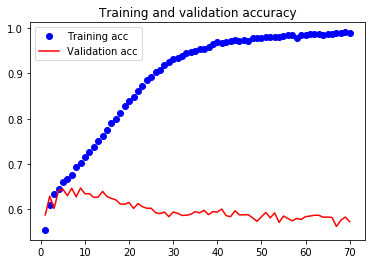

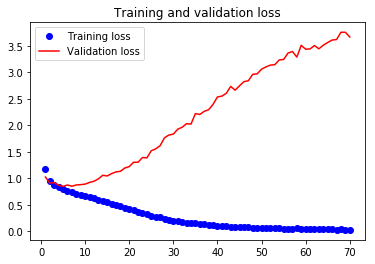

otimizador:  Adamax
eta:  0.1
num epocas:  10
Train on 18111 samples, validate on 2265 samples
Epoch 1/10
18111/18111 [==============================] - 57s 3ms/step - loss: 1.0813 - acc: 0.5741 - val_loss: 0.9535 - val_acc: 0.6040
Epoch 2/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8983 - acc: 0.6211 - val_loss: 0.9043 - val_acc: 0.6190
Epoch 3/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8224 - acc: 0.6459 - val_loss: 0.8951 - val_acc: 0.6287
Epoch 4/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.7736 - acc: 0.6671 - val_loss: 0.9066 - val_acc: 0.6252
Epoch 5/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.7320 - acc: 0.6837 - val_loss: 0.9302 - val_acc: 0.6274
Epoch 6/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.6830 - acc: 0.7063 - val_loss: 0.9476 - val_acc: 0.6212
Epoch 7/10
18111/18111 [==============================] - 55s 3ms/step - loss: 0.64

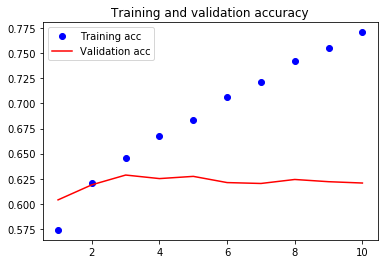

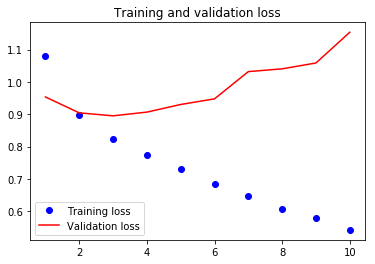

otimizador:  Adamax
eta:  0.1
num epocas:  40
Train on 18111 samples, validate on 2265 samples
Epoch 1/40
18111/18111 [==============================] - 58s 3ms/step - loss: 1.0340 - acc: 0.5860 - val_loss: 0.9509 - val_acc: 0.6155
Epoch 2/40
18111/18111 [==============================] - 54s 3ms/step - loss: 0.8641 - acc: 0.6331 - val_loss: 0.9130 - val_acc: 0.6278
Epoch 3/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8070 - acc: 0.6504 - val_loss: 0.8894 - val_acc: 0.6283
Epoch 4/40
18111/18111 [==============================] - 54s 3ms/step - loss: 0.7567 - acc: 0.6677 - val_loss: 0.9067 - val_acc: 0.6212
Epoch 5/40
18111/18111 [==============================] - 54s 3ms/step - loss: 0.7091 - acc: 0.6865 - val_loss: 0.9479 - val_acc: 0.6185
Epoch 6/40
18111/18111 [==============================] - 55s 3ms/step - loss: 0.6696 - acc: 0.7071 - val_loss: 0.9833 - val_acc: 0.6256
Epoch 7/40
18111/18111 [==============================] - 54s 3ms/step - loss: 0.63

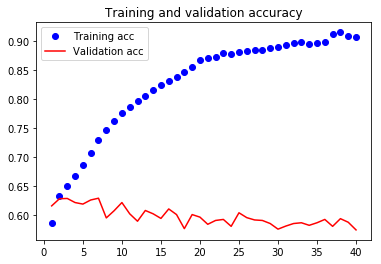

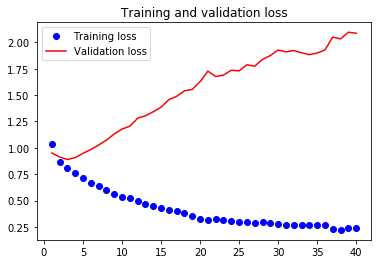

otimizador:  Adamax
eta:  0.1
num epocas:  70
Train on 18111 samples, validate on 2265 samples
Epoch 1/70
18111/18111 [==============================] - 58s 3ms/step - loss: 1.0839 - acc: 0.5740 - val_loss: 0.9939 - val_acc: 0.5912
Epoch 2/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.9059 - acc: 0.6196 - val_loss: 0.9187 - val_acc: 0.6146
Epoch 3/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.8252 - acc: 0.6472 - val_loss: 0.8968 - val_acc: 0.6305
Epoch 4/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.7681 - acc: 0.6677 - val_loss: 0.9217 - val_acc: 0.6291
Epoch 5/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.7304 - acc: 0.6870 - val_loss: 0.9660 - val_acc: 0.6190
Epoch 6/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.6906 - acc: 0.7045 - val_loss: 1.0013 - val_acc: 0.6212
Epoch 7/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.64

Epoch 60/70
18111/18111 [==============================] - 54s 3ms/step - loss: 0.1642 - acc: 0.9431 - val_loss: 2.6315 - val_acc: 0.5797
Epoch 61/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.2003 - acc: 0.9302 - val_loss: 2.5106 - val_acc: 0.5770
Epoch 62/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.2150 - acc: 0.9233 - val_loss: 2.4726 - val_acc: 0.5797
Epoch 63/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.1857 - acc: 0.9325 - val_loss: 2.4807 - val_acc: 0.5845
Epoch 64/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.1621 - acc: 0.9404 - val_loss: 2.4866 - val_acc: 0.5859
Epoch 65/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.1470 - acc: 0.9452 - val_loss: 2.6013 - val_acc: 0.5863
Epoch 66/70
18111/18111 [==============================] - 55s 3ms/step - loss: 0.1300 - acc: 0.9524 - val_loss: 2.6364 - val_acc: 0.5868
Epoch 67/70
18111/18111 [=========

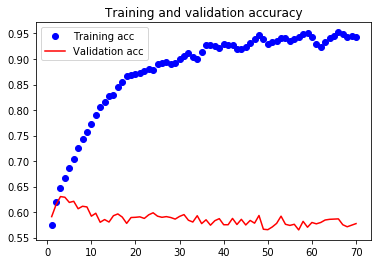

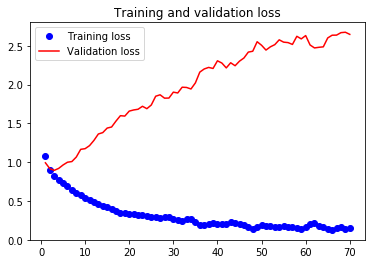

In [32]:
for i in range(0,len(name_otimizadores)):
    for j in eta:
        for k in epochs:
            print('otimizador: ', name_otimizadores[i])
            print('eta: ', j)
            print('num epocas: ', k)
            
            rnn(otimizadores[i],j,k,X_train,y_train,X_val,y_val)